In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous
%store -r Y_relative_footsteps_continuous
print(X_relative_footsteps_continuous.shape)
print(Y_relative_footsteps_continuous.shape)

(21421, 28)
(21421, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL swings
idxs = np.where(X_relative_footsteps_continuous[:, 23] == 1)[0]
X_relative_footsteps_continuous_RL_swing = X_relative_footsteps_continuous[idxs]
Y_relative_footsteps_continuous_RL_swing = Y_relative_footsteps_continuous[idxs]

## Predict RL foot -> x

In [8]:
X_relative_footsteps_continuous_RL_swing[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.01715523,  0.02680482,
        0.05156133, -0.00914702,  0.0315145 , -0.02258525,  0.23698767,
        0.17026876, -0.40873471,  0.23344301, -0.16811552, -0.40935065,
       -0.24342878,  0.16518854, -0.41243429, -0.24083982, -0.16411242,
       -0.41243872,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        ])

In [9]:
Y_relative_footsteps_continuous_RL_swing[0, :]

array([ 0.22567786,  0.17359778,  0.23985769, -0.16623835, -0.23764378,
        0.16585226, -0.25201704, -0.15896871])

### Linear Regression

In [10]:
# Input
X = np.hstack((X_relative_footsteps_continuous_RL_swing[:, :3], # motion command
               X_relative_footsteps_continuous_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_RL_swing[:, 18:20])) # RR (x,y) position 

# Target
Y = np.array([Y_relative_footsteps_continuous_RL_swing[:, 4]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_x = LinearRegression()

# Fit the model
model_rl_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9953456409433633
RMSE:  0.0011256725298778027
The lowest error is:  2.115676030478575e-07
The highest error is:  0.01702316834156342
The avg. error is:  0.0007111737625642898


In [11]:
model_rl_relative_swinging_x.coef_

array([[ 0.10428485,  0.00510955,  0.0133214 ,  0.04817634, -0.02860632,
        -0.02405465,  0.01222853,  0.4919974 ,  0.00710649,  0.11687032,
        -0.08452207]])

In [12]:
model_rl_relative_swinging_x.intercept_

array([-0.11274731])

Text(0, 0.5, 'Predictions')

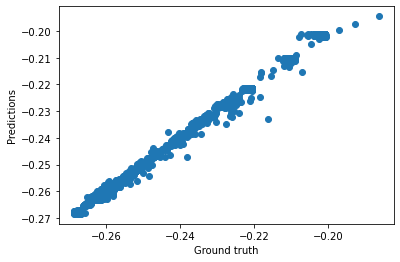

In [13]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [14]:
#%store model_rl_relative_swinging_x

In [15]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [16]:
# Save model
#joblib.dump(model_rl_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_x.sav")

### Predict RL foot -> y

In [18]:
# Input
X = np.hstack((X_relative_footsteps_continuous_RL_swing[:, :3], # motion command
               X_relative_footsteps_continuous_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_RL_swing[:, 18:20])) # RR (x,y) position 

# Target
Y = np.array([Y_relative_footsteps_continuous_RL_swing[:, 5]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_y = LinearRegression()

# Fit the model
model_rl_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9991254178243328
RMSE:  0.0009745138153199043
The lowest error is:  7.723789818281368e-07
The highest error is:  0.0205441196669168
The avg. error is:  0.0005478493888494098


In [19]:
model_rl_relative_swinging_y.coef_

array([[ 0.00923259,  0.12084786,  0.10030024, -0.01137223,  0.00521201,
        -0.02223453, -0.03500909, -0.01460259,  0.48887365, -0.09528546,
        -0.06372836]])

In [20]:
model_rl_relative_swinging_y.intercept_

array([0.0496509])

Text(0, 0.5, 'Predictions')

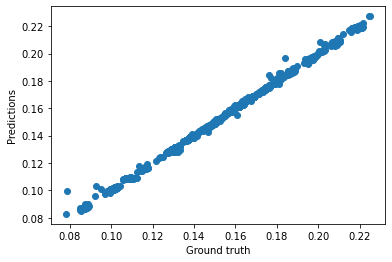

In [21]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [22]:
#%store model_rl_relative_swinging_y

In [20]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [21]:
# Save model
#joblib.dump(model_rl_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_y.sav")